In [73]:
import pandas as pd
from prophet import Prophet


def tranform_to_timestamp(in_data):
    df = pd.DataFrame(in_data)
    df["ds"] = df["date"] + " " + df["time"]
    df = df.drop(["date", "time"], axis=1)
    df = df[['ds', 'x', 'y', 'z']]

    return df


def separate_components(in_data):
    df_x = pd.DataFrame(in_data)
    df_y = pd.DataFrame(in_data)
    df_Z = pd.DataFrame(in_data)
    df_x = df_x.drop(["y", "z"], axis=1)
    df_y = df_y.drop(["x", "z"], axis=1)
    df_z = df_Z.drop(["y", "x"], axis=1)
    df_x = df_x.rename(columns={"x": "y"})
    df_z = df_z.rename(columns={"z": "y"})
    return df_x,df_y,df_z

In [74]:
in_data = pd.read_csv("D:\\fax\\master\\op-ml\\prophetLarets\\train_data.csv")

timeSeriesData = tranform_to_timestamp(in_data)


data_x,data_y,data_z=separate_components(timeSeriesData)

data_x.head()



,ds,y
0,2021-12-31 23:42:00,580097.336
1,2021-12-31 23:45:00,-556348.107
2,2021-12-31 23:48:00,-1690951.773
3,2021-12-31 23:51:00,-2779724.029
4,2021-12-31 23:54:00,-3779783.815


In [16]:
data_y.head()

,ds,y
0,2021-12-31 23:42:00,-819477.269
1,2021-12-31 23:45:00,-1566013.669
2,2021-12-31 23:48:00,-2225602.384
3,2021-12-31 23:51:00,-2774795.453
4,2021-12-31 23:54:00,-3195305.020


In [17]:
data_z.head()

,ds,y
0,2021-12-31 23:42:00,6971833.474
1,2021-12-31 23:45:00,6845379.446
2,2021-12-31 23:48:00,6467359.447
3,2021-12-31 23:51:00,5851637.160
4,2021-12-31 23:54:00,5020812.365


this turns on seasonal components

In [35]:
model_x = Prophet(
    growth="flat",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)

model_x.fit(data_x) #simply fits model 

09:53:07 - cmdstanpy - INFO - Chain [1] start processing
09:53:11 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
model_y = Prophet(
    growth="flat",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)

model_y.fit(data_y)  # simply fits model

10:01:32 - cmdstanpy - INFO - Chain [1] start processing
10:01:35 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
model_z = Prophet(
    growth="flat",
    yearly_seasonality=False,#false no seasonalities
    weekly_seasonality=False,
    daily_seasonality=False,
)

model_z.fit(data_z)  # simply fits model

10:24:38 - cmdstanpy - INFO - Chain [1] start processing
10:24:40 - cmdstanpy - INFO - Chain [1] done processing


to tune frequency

In [51]:
future_x = model_x.make_future_dataframe(freq='min',periods=10000)
future_x.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


In [52]:
future_y = model_y.make_future_dataframe(freq="min", periods=10000)
future_y.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


In [67]:
future_z = model_z.make_future_dataframe(freq="min", periods=10000)
future_z.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


to tune frequency

In [54]:
future_x = model_x.make_future_dataframe(freq='min',periods=10000)
future_x.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


In [55]:
future_y = model_y.make_future_dataframe(freq="min", periods=10000)
future_y.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


In [68]:
future_z = model_z.make_future_dataframe(freq="min", periods=10000)
future_z.tail()

,ds
116267,2022-08-17 16:51:00
116268,2022-08-17 16:52:00
116269,2022-08-17 16:53:00
116270,2022-08-17 16:54:00
116271,2022-08-17 16:55:00


In [58]:
forecast_x = model_x.predict(future_x)
forecast_x[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
116267,2022-08-17 16:51:00,-120379.751528,-5.014543e+06,4.345452e+06
116268,2022-08-17 16:52:00,-120415.357105,-4.584484e+06,4.390222e+06
116269,2022-08-17 16:53:00,-120450.808752,-4.756209e+06,4.377424e+06
116270,2022-08-17 16:54:00,-120486.100052,-4.653460e+06,4.501680e+06
116271,2022-08-17 16:55:00,-120521.224621,-4.451402e+06,4.379188e+06


In [59]:
forecast_y = model_y.predict(future_y)
forecast_y[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
116267,2022-08-17 16:51:00,119631.754168,-4.352574e+06,4.639755e+06
116268,2022-08-17 16:52:00,119652.826163,-4.191199e+06,4.547724e+06
116269,2022-08-17 16:53:00,119673.787320,-4.489622e+06,4.731815e+06
116270,2022-08-17 16:54:00,119694.637583,-4.099575e+06,4.576748e+06
116271,2022-08-17 16:55:00,119715.376921,-4.638952e+06,4.644980e+06


In [69]:
forecast_z = model_z.predict(future_z)
forecast_z[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
116267,2022-08-17 16:51:00,-11999.536381,-6.429472e+06,6.406793e+06
116268,2022-08-17 16:52:00,-11999.536381,-6.787763e+06,6.370873e+06
116269,2022-08-17 16:53:00,-11999.536381,-6.309716e+06,6.326805e+06
116270,2022-08-17 16:54:00,-11999.536381,-6.038213e+06,6.583137e+06
116271,2022-08-17 16:55:00,-11999.536381,-6.194901e+06,6.241733e+06


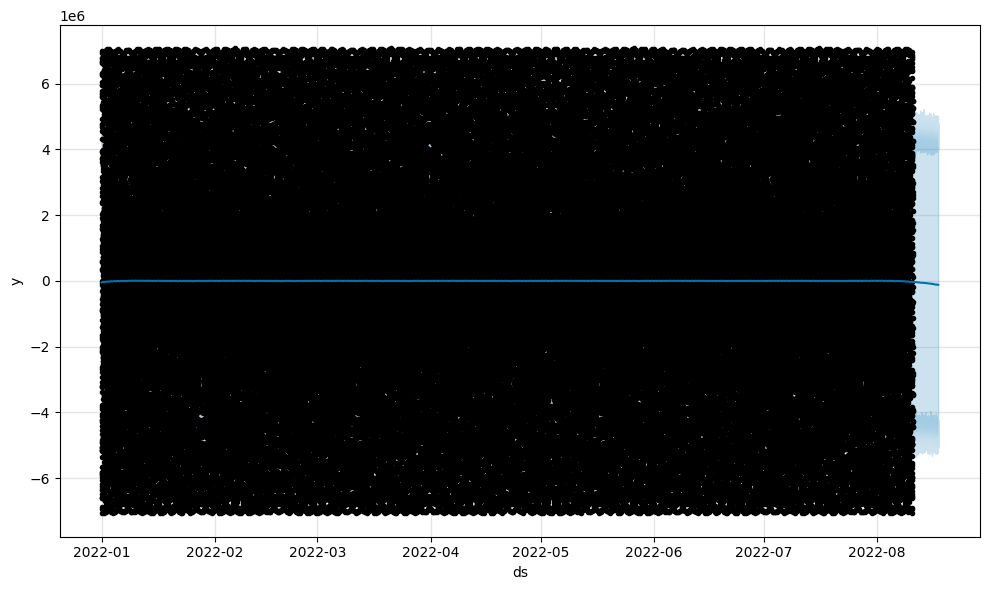

In [61]:
fig_x1 = model_x.plot(forecast_x) #not usable to many values

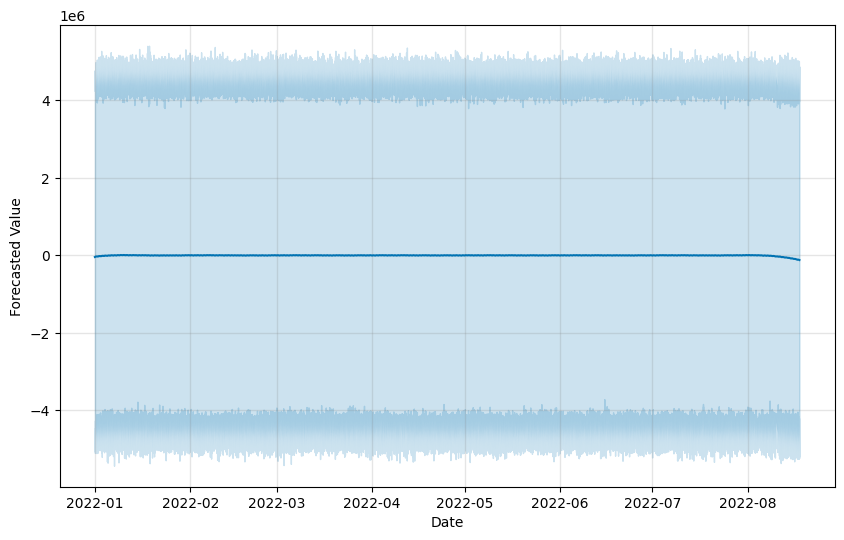

In [62]:
import matplotlib.pyplot as plt

fig_x1 = plt.figure(facecolor="w", figsize=(10, 6))
ax = fig_x1.add_subplot(111)

# Plot the forecasted values
ax.plot(forecast_x["ds"], forecast_x["yhat"], ls="-", c="#0072B2")

# Optionally, plot the uncertainty intervals
ax.fill_between(
    forecast_x["ds"],
    forecast_x["yhat_lower"],
    forecast_x["yhat_upper"],
    color="#0072B2",
    alpha=0.2,
)

ax.set_xlabel("Date")
ax.set_ylabel("Forecasted Value")
ax.grid(True, which="major", c="gray", ls="-", lw=1, alpha=0.2)

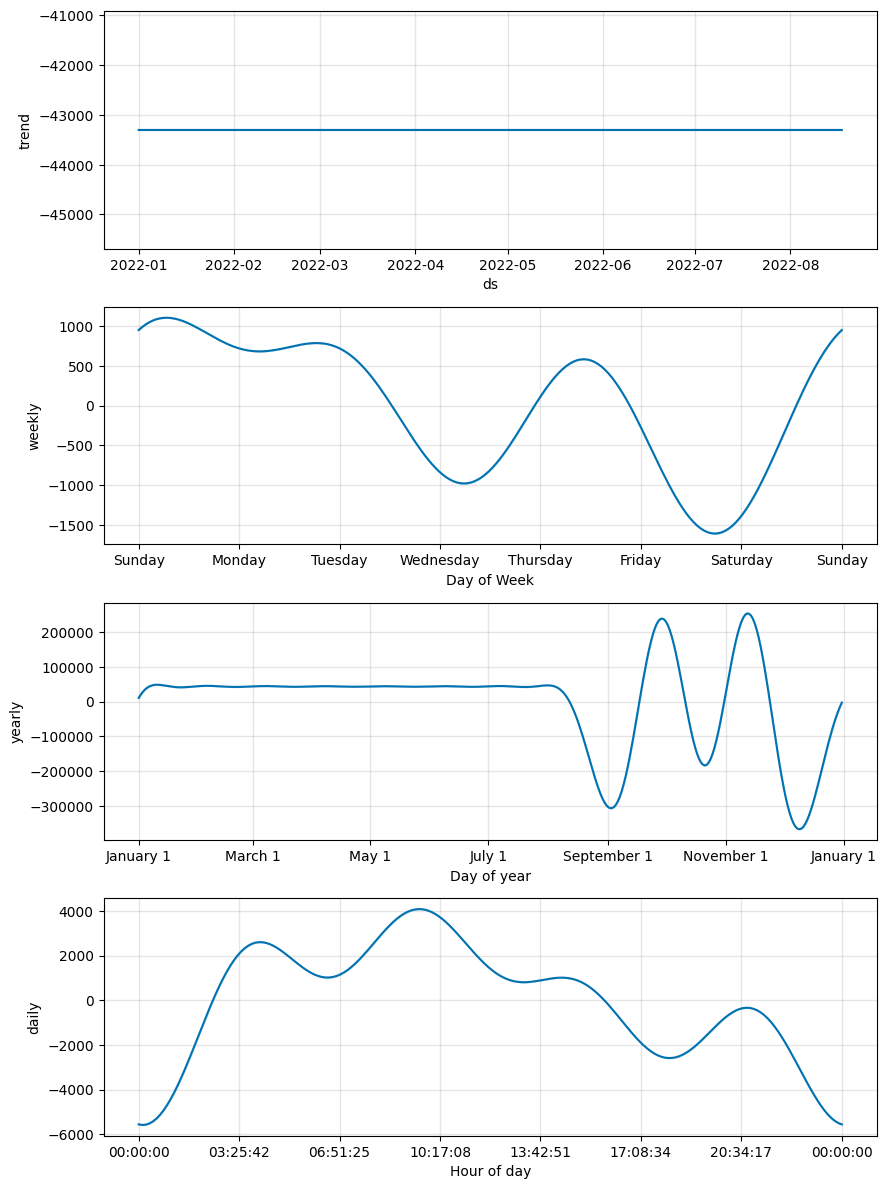

In [63]:
fig_x2 = model_x.plot_components(forecast_x)

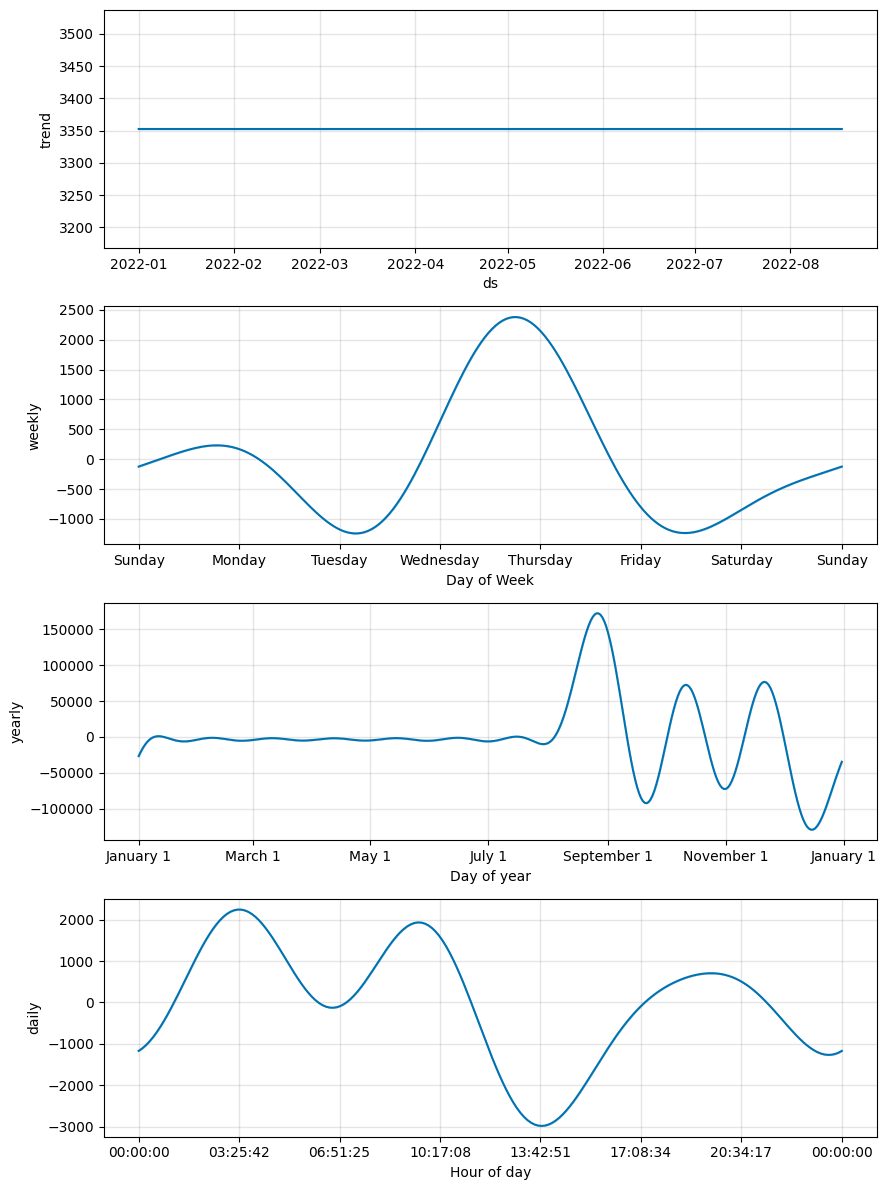

In [64]:
fig_y2 = model_y.plot_components(forecast_y)

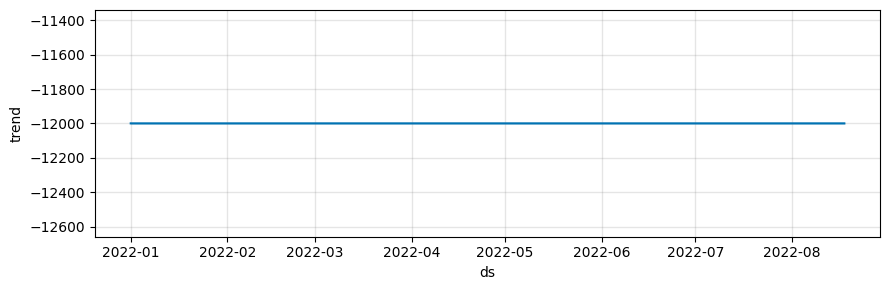

In [70]:
fig_z2 = model_z.plot_components(forecast_z)

Interactive

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_components_plotly(model_x, forecast_x)